# An Introduction to ARC 3.0: Alkali.ne Rydberg Calculator

Authors: Elizabeth J. Robertson, Nikola Šibalić, Robert M. Potvliege, Matthew P. A. Jones

Updated 15/11/2020

This notebooks gives examples of new functionality introduced in ARC version 3.0: support for calculations of states, Stark maps and pair-state interactions for **Alkaline Earths**, pertubative van der Waals $C_6$ calculations in manifold of energy-degenerate states, inter-species pair-state calculatons, and general new calculation methods for working with **Wavefunctions** (supported for Alkali only), **Optical lattices** in 1D (calculation of recoil energies, Bloch bands, Wannier states...), **atom-surface van der Waals interactions** and calculation of **dynamic polarisabilities** (magic wavelengths and other details useful for atom-trapping).
For introduction to Rydberg-state calculations, also available in the original ARC version, we point users to the [An Introduction to Rydberg atoms with ARC](https://arc-alkali-rydberg-calculator.readthedocs.io/en/latest/_static/Rydberg_atoms_a_primer.html) . For general introduction into physics of Rydberg states and their properties and applications see [Rydberg Physics ebook published by IOP](https://doi.org/10.1088/978-0-7503-1635-4).

For preprint detailing this extension plese see [arxiv:2007.12016](https://arxiv.org/abs/2007.12016)

**Contents:**

0. [Preliminaries: general note on using ARC with Alkaline Earths](#Preliminaries:-general-note-on-using-ARC-with-Alkaline-Earths)
1. [General atom calculations with Alkaline earths](#General-atom-calculations-with-Alkaline-earths)
2. [Stark maps with Alkaline Earths](#Stark-maps-with-Alkaline-Earths)
3. [Pair-state interactions between Rydberg states of Alkaline Earths](#Pair-state-interactions-between-Rydberg-states-of-Alkaline-Earths)

   3.1 [Pertubative C6 calculation in the manifold of degenerate states](#Pertubative-C6-calculation-in-the-manifold-of-degenerate-states)

4. [Inter-species pair-state calculations](#Inter-species-pair-state-calculations)
5. [Stark tuned Forster resonances](#Stark-tuned-Forster-resonances)
6. [Wavefunction calculations for Alkali atom Rydberg states](#Wavefunction-calculations-for-Alkali-atom-Rydberg-states)
7. [Atom-surface van der Waals interactions ($C_3$ calculation)](#Atom-surface-van-der-Waals-interactions-(C3-calculation))
8. [Optical lattice calculations (Bloch bands, Wannier states...)](#Optical-lattice-calculations-(Bloch-bands,-Wannier-states...))
9. [Calculations of dynamic polarisability and magic wavelengths for optical traps](#Calculations-of-dynamic-polarisability-and-magic-wavelengths-for-optical-traps)

# Preliminaries: general note on using ARC with Alkaline Earths

Dipole matrix elements for Alkaline Earths are calculated using single active electron approximation. DME are calculated based using semi-classical approximation. DME obtained in this way are in general correct for higher lying states only. See publication for details.

Install latest version of ARC

In [7]:
!pip install ARC-Alkali-Rydberg-Calculator --upgrade --no-cache-dir

     |████████████████████████████████| 26.5 MB 3.6 MB/s eta 0:00:01
  Created wheel for ARC-Alkali-Rydberg-Calculator: filename=ARC_Alkali_Rydberg_Calculator-3.0.5-cp37-cp37m-linux_x86_64.whl size=27213900 sha256=b45d2699b977ba32e0f98c4d394c1c7ed6eb76d242c5b434f754bd7b679489be
  Stored in directory: /tmp/pip-ephem-wheel-cache-o1_eqn86/wheels/65/1b/f7/d1bf9618d21b663745262ffab701b86d0f2cd64831c4d9c86d
Successfully built ARC-Alkali-Rydberg-Calculator
  Attempting uninstall: ARC-Alkali-Rydberg-Calculator
    Found existing installation: ARC-Alkali-Rydberg-Calculator 3.0.4
    Uninstalling ARC-Alkali-Rydberg-Calculator-3.0.4:
      Successfully uninstalled ARC-Alkali-Rydberg-Calculator-3.0.4


To use ARC in your Python project, import module as

In [1]:
from arc import *

# General atom calculations with Alkaline earths

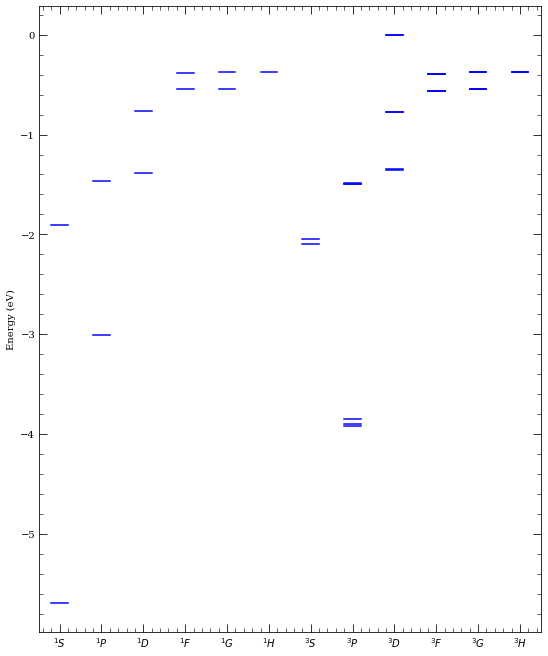

In [2]:
atom= Strontium88()

calc = LevelPlot(atom)
calc.makeLevels(5,6,0,5,sList=[0,1])
calc.drawLevels()
calc.showPlot()


NOTE: Interactive clickable plot, allowing finding wavelengths and frequencies for transitions beteen different states, opens if used from command line as in in ```python code.py```
or if notebook is initialised with stand-alone, instead inline figures. This requires calling following line after import of arc:

In [3]:
from arc import *
%matplotlib qt

atom= Strontium88()

calc = LevelPlot(atom)
calc.makeLevels(5,6,0,5,sList=[0,1])
calc.drawLevels()
calc.showPlot()

We will use inline plots for the rest of this notebook, but it's easy to switch

In [4]:
%matplotlib inline

### Test simple d.m.e and related calcualtion

In [5]:
atom= Strontium88()
atom.getRadialMatrixElement(15,0,0, 15, 1, 1, s=0)


149.5310632945744

In [6]:
print(atom.getDipoleMatrixElement(15,0,0,0,15,1,1,0,0,s=0))
print(atom._getRadialDipoleSemiClassical(
            15,0, 0, 15, 1, 1, s=0            ))
print(atom.getQuantumDefect(6, 0, 0, s=0))

86.33179964533346
149.5310632945744
3.3075312049137446


In [7]:
print(atom.getDipoleMatrixElement(15,0,1,0,15,1,2,0,0,s=1))

76.17446729646512


### Test of vapour pressures

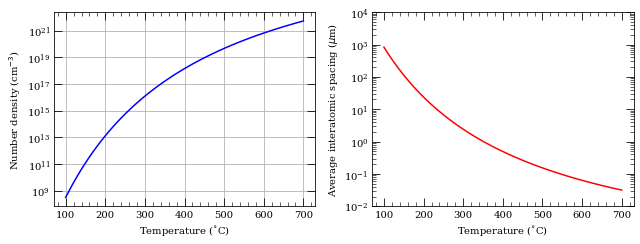

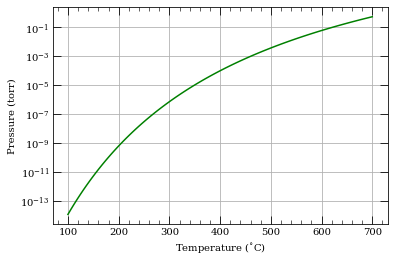

In [8]:
temperature = np.linspace(100+273.15,700+273.15,100)
numberDensity = []
interatomicSpacing=[]
pressure = []
for t in temperature:
    pressure.append(atom.getPressure(t))
    numberDensity.append(atom.getNumberDensity(t))
    interatomicSpacing.append(atom.getAverageInteratomicSpacing(t)*1e6)

pressure = np.array(pressure)
    
fig,ax = plt.subplots(1, 2,figsize=(9,3.5))
ax[0].semilogy(temperature-273.15,numberDensity,"b-")
ax[0].set_xlabel("Temperature ($^{\circ}$C)")
ax[0].set_ylabel("Number density (cm$^{-3}$)")
ax[0].grid()

ax[1].semilogy(temperature-273.15,interatomicSpacing,"r-")
ax[1].set_xlabel("Temperature ($^{\circ}$C)")
ax[1].set_ylabel("Average interatomic spacing ($\mu$m)")
ax[1].set_ylim(0.01,10000)
plt.tight_layout()
plt.show()

f = plt.figure()
ax = f.add_subplot(111)
ax.semilogy(temperature-273.15,pressure/133.322,"g-")
ax.set_xlabel("Temperature ($^{\circ}$C)")
ax.set_ylabel("Pressure (torr)")
ax.grid()

In [9]:
print(atom.getPressure(400+ 273.15))

0.013336243497052324


### Plot quantum defects

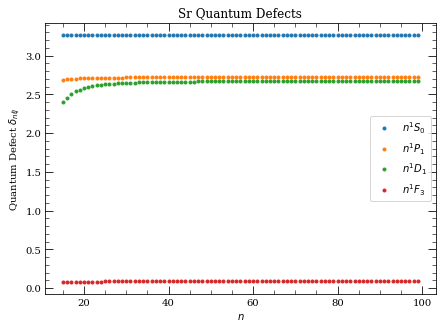

In [10]:
atom = Strontium88()
n=np.arange(15,100,1)
    
fig, axes = plt.subplots(1, 1, figsize=(7,5))

axes.plot(n,atom.getQuantumDefect(n,0,0,s=0),'.',
          label=("$%s$" % printStateStringLatex("n",0,0,s=0) ))
axes.plot(n,atom.getQuantumDefect(n,1,1,s=0),'.',
          label=("$%s$" % printStateStringLatex("n",1,1,s=0)))
axes.plot(n,atom.getQuantumDefect(n,2,1,s=1),'.',
          label=("$%s$"% printStateStringLatex("n",2,1,s=0) ) )
axes.plot(n,atom.getQuantumDefect(n,3,3,s=0),'.'
          ,label=("$%s$" % printStateStringLatex("n",3,3,s=0) ))
axes.legend(loc=0)
axes.set_xlabel('$n$')
axes.set_ylabel('Quantum Defect $\delta_{n\ell j}$')
axes.set_title('Sr Quantum Defects')
plt.show()

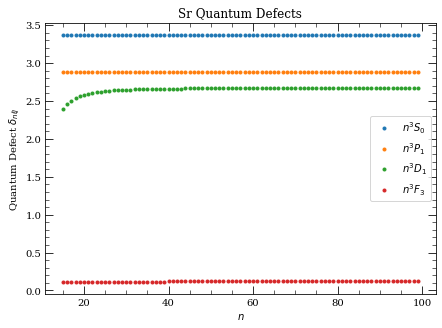

In [11]:
atom = Strontium88()
n=np.arange(15,100,1)

fig, axes = plt.subplots(1, 1, figsize=(7,5))

axes.plot(n,atom.getQuantumDefect(n,0,0,s=1),'.',
          label=("$%s$" % printStateStringLatex("n",0,0,s=1) ))
axes.plot(n,atom.getQuantumDefect(n,1,1,s=1),'.',
          label=("$%s$" % printStateStringLatex("n",1,1,s=1)))
axes.plot(n,atom.getQuantumDefect(n,2,1,s=1),'.',
          label=("$%s$"% printStateStringLatex("n",2,1,s=1) ) )
axes.plot(n,atom.getQuantumDefect(n,3,3,s=1),'.'
          ,label=("$%s$" % printStateStringLatex("n",3,3,s=1) ))
axes.legend(loc=0)
axes.set_xlabel('$n$')
axes.set_ylabel('Quantum Defect $\delta_{n\ell j}$')
axes.set_title('Sr Quantum Defects')
plt.show()

In [12]:
atom = Strontium88()
atom.getEnergy(62,2,2,s=0)
print("%.3f nm" % (atom.getTransitionWavelength(5,0,0, 5, 1, 1, s=0, s2=1) *1e9) )
print("%.3f THz" % (atom.getTransitionFrequency(5,0,0, 5, 1, 1, s=0, s2=1) *1e-12) )

689.449 nm
434.829 THz


In [13]:

atom = Strontium88(preferQuantumDefects = True)
atom.getEnergy(62,2,2,s=0)

-0.003826740461064719

# Stark maps with Alkaline Earths


Found  600  states.
Generating matrix...
100%

Finding eigenvectors...
100%

plotting...


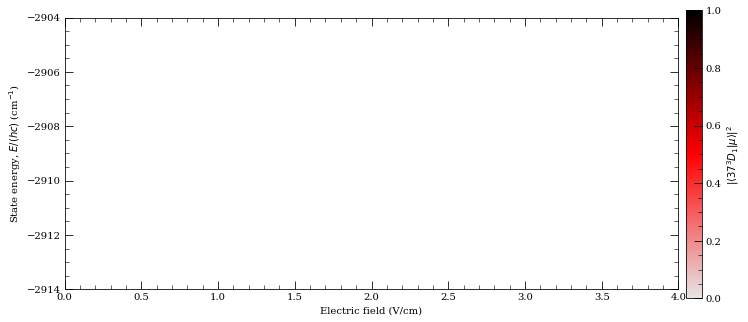

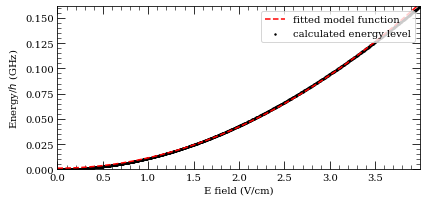

-20.46519 MHz cm^2 / V^2 


In [20]:
calc = StarkMap(Strontium88())

# Target state
n0=37;l0=2;j0=1;mj0=1;  
# Define max/min n values in basis
nmin=n0-5
nmax=n0+5
# Maximum value of l to include (l~20 gives good convergence for states with l<5)
lmax=20

# Initialise Basis States for Solver : progressOutput=True gives verbose output
calc.defineBasis(n0, l0, j0, mj0, nmin, nmax, lmax, progressOutput=True, s=1)

Emin=0. # Min E field (V/m)
Emax=4.e2 # Max E field (V/m)
N=1001 # Number of Points

# Generate Stark Map
calc.diagonalise(np.linspace(Emin,Emax,N), progressOutput=True)
# Show Sark Map
calc.plotLevelDiagram(progressOutput=True,units=0,highlightState = True)
calc.ax.set_ylim(-2914, -2904)
calc.showPlot(interactive = False)
# Return Polarizability of target state    
print("%.5f MHz cm^2 / V^2 " % calc.getPolarizability(showPlot=True, minStateContribution=0.9))
    



Found  620  states.
Generating matrix...
100%

Finding eigenvectors...
100%

plotting...


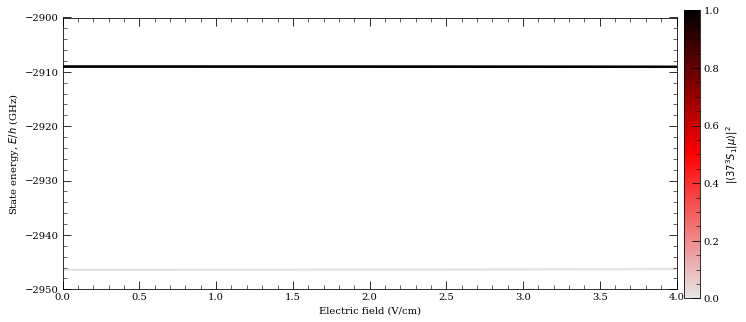

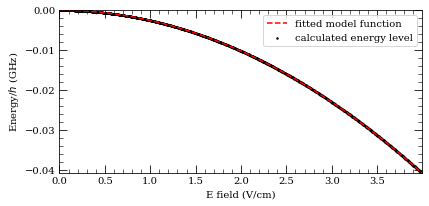

5.11812 MHz cm^2 / V^2 


In [19]:
calc = StarkMap(Strontium88())

# Target state
n0=37;l0=0;j0=1;mj0=0;  
# Define max/min n values in basis
nmin=n0-5
nmax=n0+5
# Maximum value of l to include (l~20 gives good convergence for states with l<5)
lmax=20

# Initialise Basis States for Solver : progressOutput=True gives verbose output
calc.defineBasis(n0, l0, j0, mj0, nmin, nmax, lmax, progressOutput=True, s=1)

Emin=0. # Min E field (V/m)
Emax=4.e2 # Max E field (V/m)
N=1001 # Number of Points

# Generate Stark Map
calc.diagonalise(np.linspace(Emin,Emax,N), progressOutput=True)
# Show Sark Map
calc.plotLevelDiagram(progressOutput=True,units="GHz",highlightState = True)
calc.ax.set_ylim(-2950,-2900)
calc.showPlot(interactive = False)
# Return Polarizability of target state    
print("%.5f MHz cm^2 / V^2 " % calc.getPolarizability(showPlot=True, minStateContribution=0.9))
    



Found  620  states.
Generating matrix...
100%

Finding eigenvectors...
100%

plotting...


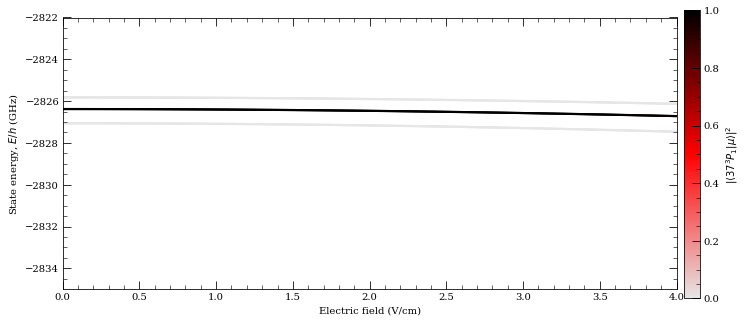

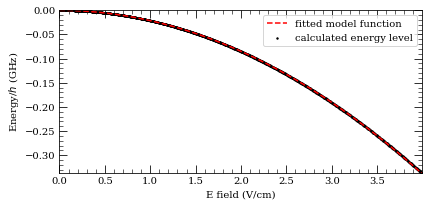

42.33374 MHz cm^2 / V^2 


In [21]:
calc = StarkMap(Strontium88())

#Target state
n0=37;l0=1;j0=1;mj0=0;  
#Define max/min n values in basis
nmin=n0-5
nmax=n0+5
#Maximum value of l to include (l~20 gives good convergence for states with l<5)
lmax=20

#Initialise Basis States for Solver : progressOutput=True gives verbose output
calc.defineBasis(n0, l0, j0, mj0, nmin, nmax, lmax, progressOutput=True, s=1)

Emin=0. #Min E field (V/m)
Emax=4.e2 #Max E field (V/m)
N=1001 #Number of Points

#Generate Stark Map
calc.diagonalise(np.linspace(Emin,Emax,N), progressOutput=True)
#Show Sark Map
calc.plotLevelDiagram(progressOutput=True,units="GHz",highlightState = True)
calc.ax.set_ylim(-2835,-2822)
calc.showPlot(interactive = False)
#Return Polarizability of target state    
print("%.5f MHz cm^2 / V^2 " % calc.getPolarizability(showPlot=True, minStateContribution=0.9))
    



Found  294  states.
Generating matrix...
100%

Finding eigenvectors...
100%

plotting...


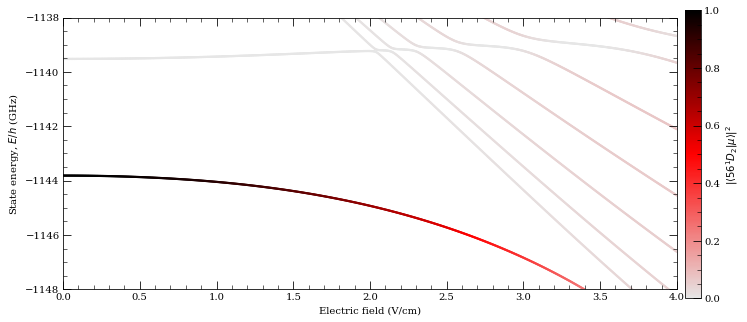

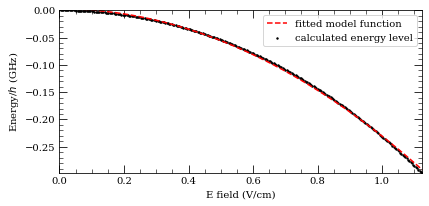

466.49246 MHz cm^2 / V^2 


In [22]:
calc = StarkMap(Strontium88())

# Target state
n0=56;l0=2;j0=2;mj0=0; s=0
# Define max/min n values in basis
nmin=n0-7
nmax=n0+7
# Maximum value of l to include (l~20 gives good convergence for states with l<5)
lmax=20

# Initialise Basis States for Solver : progressOutput=True gives verbose output
calc.defineBasis(n0, l0, j0, mj0, nmin, nmax, lmax, progressOutput=True, s=s)

Emin=0. # Min E field (V/m)
Emax=4.e2 # Max E field (V/m)
N=1001 # Number of Points

# Generate Stark Map
calc.diagonalise(np.linspace(Emin,Emax,N), progressOutput=True)
# Show Sark Map
calc.plotLevelDiagram(progressOutput=True,units="GHz",highlightState = True)
calc.ax.set_ylim(-1148,-1138)
calc.showPlot(interactive = False)
# Return Polarizability of target state    
print("%.5f MHz cm^2 / V^2 " % calc.getPolarizability(showPlot=True, minStateContribution=0.9))
    



# Pair-state interactions between Rydberg states of Alkaline Earths

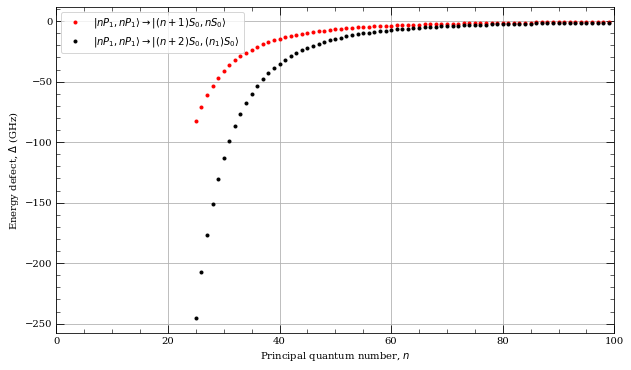

In [23]:
atom = Strontium88()
nlist=np.arange(25,100,1)
    

fig, axes = plt.subplots(1, 1, figsize=(10,6))
s = 0
l1 = 1 ; j1 = 1 #  ^1P_1
l2 = 0 ; j2 = 0 # ^1S_{0}
energyDefect = []
for n in nlist:
    energyDefect.append(atom.getEnergyDefect2(n,l1,j1,n,l1,j1,n+1,l2,j2,n,l2,j2,s)/(C_h)*1e-9)    
axes.plot(nlist,energyDefect,'r.',\
          label=r"$|n%s_%d,n%s_%d\rangle\rightarrow|(n+1) %s_%d,n %s_%d\rangle$"%\
              (printStateLetter(l1),int(j1),printStateLetter(l1),int(j1),\
              printStateLetter(l2),int(j2),printStateLetter(l2),int(j2)))

l1 = 1 ; j1 = 1 #  ^1P_1
l2 = 0 ; j2 = 0 # ^1S_0
energyDefect = []
for n in nlist:
    energyDefect.append(atom.getEnergyDefect2(n,l1,j1,n,l1,j1,n+2,l2,j2,n-1,l2,j2,s)/(C_h)*1e-9)
axes.plot(nlist,energyDefect,'k.',\
          label=r"$|n%s_%d,n%s_%d\rangle\rightarrow |(n+2) %s_%d,(n_1) %s_%d\rangle$"%\
              (printStateLetter(l1),int(j1),printStateLetter(l1),int(j1),\
              printStateLetter(l2),int(j2),printStateLetter(l2),int(j2)))



axes.set_xlim(0,100)
axes.legend(loc=0,fontsize=10)
axes.set_ylabel("Energy defect, $\Delta$ (GHz)")
axes.set_xlabel("Principal quantum number, $n$")
axes.grid()
plt.legend
plt.show()


Calculating Hamiltonian matrix...


	matrix (dimension  330 )

Matrix R3 100.0 % (state 98 of 98)



/home/nikola/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)




Diagonalizing interaction matrix...

99% Now we are plotting...


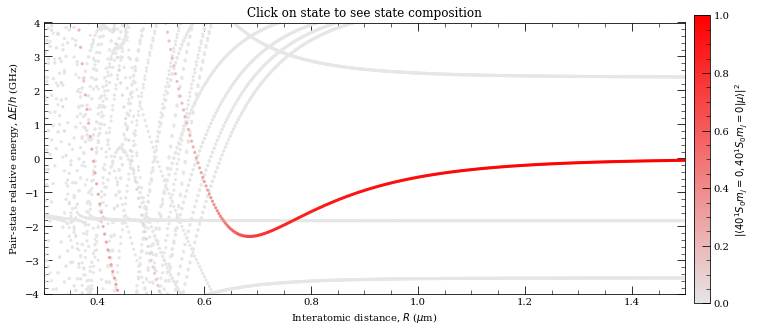

0

In [24]:
n0=40;l0=0;j0=0;mj0=0; #Target State
theta=0; #Polar Angle [0-pi]
phi=0; #Azimuthal Angle [0-2pi]
dn = 5; #Range of n to consider (n0-dn:n0+dn)
dl = 5; #Range of l values
deltaMax = 45e9 #Max pair-state energy difference [Hz]

#Set target-state
calc = PairStateInteractions(Strontium88(),
                             n0,l0,j0,
                             n0,l0,j0,
                             mj0,mj0,interactionsUpTo = 1,
                             s=0)

#R array (um)
r=np.linspace(0.3,1.5,400)

#Generate pair-state interaction Hamiltonian
calc.defineBasis(theta,phi, dn,dl, deltaMax,
                 progressOutput=True, debugOutput=False)
#Diagonalise
nEig=250 #Number of eigenstates to extract
calc.diagonalise(r,nEig,progressOutput=True)
#Plot    
calc.plotLevelDiagram()
#Zoom-on on pair state
calc.ax.set_xlim(.3,1.5)
calc.ax.set_ylim(-4,4)
calc.showPlot()  # by default program will plot interactive plots
# however plots are interactive only if open oin standard window
# and not in the %inline mode of the notebooks

In [12]:
value = []
nValue = [25,30,35,40,45,50,55,60,65,70,75,80]
for n in nValue:
    calculation1 = PairStateInteractions(Strontium88(), n, 0, 0, n, 0, 0, 0, 0, s=0)
    state = printStateString(n,0,0,s=0)+" mj=0"
    c6 = calculation1.getC6perturbatively(0,0, 6, 65e9)
    value.append(c6)
    print("C_6 [%s] = %.5f GHz (mu m)^6" % (state,c6))


C_6 [25 1S 0 mj=0] = 0.00207 GHz (mu m)^6
C_6 [30 1S 0 mj=0] = 0.01997 GHz (mu m)^6
C_6 [35 1S 0 mj=0] = 0.12905 GHz (mu m)^6
C_6 [40 1S 0 mj=0] = 0.63257 GHz (mu m)^6
C_6 [45 1S 0 mj=0] = 2.52962 GHz (mu m)^6
C_6 [50 1S 0 mj=0] = 8.21830 GHz (mu m)^6
C_6 [55 1S 0 mj=0] = 25.63188 GHz (mu m)^6
C_6 [60 1S 0 mj=0] = 69.85196 GHz (mu m)^6
C_6 [65 1S 0 mj=0] = 175.02104 GHz (mu m)^6
C_6 [70 1S 0 mj=0] = 408.06108 GHz (mu m)^6
C_6 [75 1S 0 mj=0] = 891.08918 GHz (mu m)^6
C_6 [80 1S 0 mj=0] = 1884.93775 GHz (mu m)^6


Text(0, 0.5, '$C_6$(GHz $\\mu$m$^6$)')

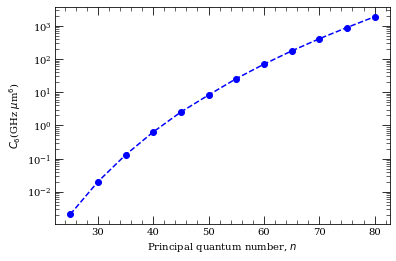

In [11]:
f = plt.figure();
ax = f.add_subplot(1,1,1)
ax.semilogy(nValue, value,"bo--")
ax.set_xlabel(r"Principal quantum number, $n$")
ax.set_ylabel(r"$C_6$(GHz $\mu$m$^6$)")

This matches nicely with result from Mukherjee, Rick, "Strong interactions in alkaline-earth Rydberg ensembles", PhD thesis (2013), (Fig. 3.6)

# Pertubative C6 calculation in the manifold of degenerate states
For states that don't satisfy $m_{J1}+m_{J2} = J_1+J_2$, or when there is non-zero angle between the interatomic axis and quantisation axis, in absence of magnetic field all $m_j$ states are degenerate **and** some can be coupled with dipole-dipole coupling Hamiltonian. Therefore, we have to use degenerate pertubation theory.

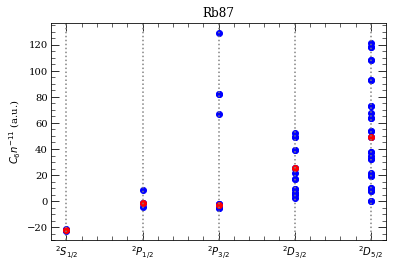

In [2]:
atom = Rubidium87()
n = 50
s = 0.5
series = [[0,0.5,0.5],
          [1,0.5,0.5],
          [1,1.5,1.5],
          [2,1.5,1.5],
          [2,2.5,2.5]
         ]
f = plt.figure()
ax = f.add_subplot(1,1,1)
xtick=[]
xticklabel=[]

for i,l_j_mj in enumerate(series):
    calc = PairStateInteractions(atom,
                                 n, l_j_mj[0], l_j_mj[1],
                                 n, l_j_mj[0], l_j_mj[1], 
                                  l_j_mj[2], l_j_mj[2],
                                 s=s
                                )
    c6, eigenvectors = calc.getC6perturbatively(0,0,4, 30e9, degeneratePerturbation=True)

    # rescale results
    c6 = c6 / n**11 / 1.4448e-19  # to get a.u. used in C. Vaillant et.al. paper
    
    x = i * np.ones((len(c6)))
    ax.plot(x, c6, "bo")
    
    c6 = calc.getC6perturbatively(0,0,4, 30e9, degeneratePerturbation=False)
    c6 = c6 / n**11 / 1.4448e-19  # to get a.u. used in C. Vaillant et.al. paper
    
    x = i * np.array([1])
    ax.plot(x, c6, "ro")
    
    ax.axvline(x=x[0],linestyle=":",color="grey")
    xtick.append(i)
    xticklabel.append(r"$^%d%s_{%d/2}$" % (2*s+1, printStateLetter(l_j_mj[0]), 2*l_j_mj[1]))

plt.title(atom.elementName)
ax.get_xaxis().set_ticks(xtick)
ax.set_xticklabels(xticklabel)
plt.ylabel("$C_6n^{-11}$ (a.u.)")
plt.show()
    

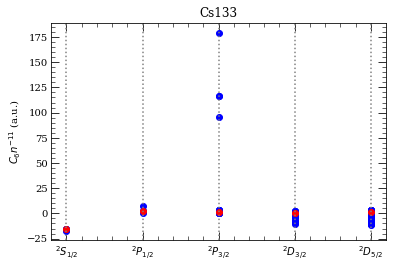

In [26]:
atom = Cesium()
n = 50
s = 0.5
series = [[0,0.5,0.5],
          [1,0.5,0.5],
          [1,1.5,1.5],
          [2,1.5,1.5],
          [2,2.5,2.5]
         ]
f = plt.figure()
ax = f.add_subplot(1,1,1)
xtick=[]
xticklabel=[]

for i,l_j_mj in enumerate(series):
    calc = PairStateInteractions(atom,
                                 n, l_j_mj[0], l_j_mj[1],
                                 n, l_j_mj[0], l_j_mj[1], 
                                  l_j_mj[2], l_j_mj[2],
                                 s=s
                                )
    c6, eigenvectors = calc.getC6perturbatively(0,0,4, 30e9, degeneratePerturbation=True)

    # rescale results
    c6 = c6 / n**11 / 1.4448e-19  # to get a.u. used in C. Vaillant et.al. paper
    
    x = i * np.ones((len(c6)))
    ax.plot(x, c6, "bo")  # - in front of C6 is to match sign definition from  C. Vaillant et.al. paper
    
    c6 = calc.getC6perturbatively(0,0,4, 30e9, degeneratePerturbation=False)
    c6 = c6 / n**11 / 1.4448e-19  # to get a.u. used in C. Vaillant et.al. paper
    
    x = i * np.array([1])
    ax.plot(x, c6, "ro")
    
    ax.axvline(x=x[0],linestyle=":",color="grey")
    xtick.append(i)
    xticklabel.append(r"$^%d%s_{%d/2}$" % (2*s+1, printStateLetter(l_j_mj[0]), 2*l_j_mj[1]))

plt.title(atom.elementName)
ax.get_xaxis().set_ticks(xtick)
ax.set_xticklabels(xticklabel)
plt.ylabel("$C_6n^{-11}$ (a.u.)")
plt.show()
    

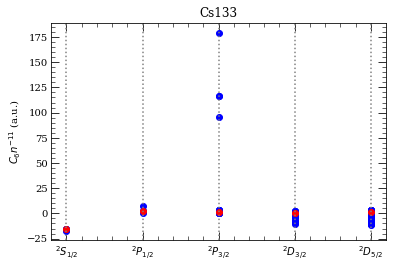

In [27]:
atom = Cesium()
n = 50
s = 0.5
series = [[0,0.5,0.5],
          [1,0.5,0.5],
          [1,1.5,1.5],
          [2,1.5,1.5],
          [2,2.5,2.5]
         ]
f = plt.figure()
ax = f.add_subplot(1,1,1)
xtick=[]
xticklabel=[]

for i,l_j_mj in enumerate(series):
    calc = PairStateInteractions(atom,
                                 n, l_j_mj[0], l_j_mj[1],
                                 n, l_j_mj[0], l_j_mj[1], 
                                  l_j_mj[2], l_j_mj[2],
                                 s=s
                                )
    c6, eigenvectors = calc.getC6perturbatively(0,0,4, 30e9, degeneratePerturbation=True)

    # rescale results
    c6 = c6 / n**11 / 1.4448e-19  # to get a.u. used in C. Vaillant et.al. paper
    
    x = i * np.ones((len(c6)))
    ax.plot(x, c6, "bo")
    
    c6 = calc.getC6perturbatively(0,0,4, 30e9, degeneratePerturbation=False)
    c6 = c6 / n**11 / 1.4448e-19  # to get a.u. used in C. Vaillant et.al. paper
    
    x = i * np.array([1])
    ax.plot(x, c6, "ro")
    
    ax.axvline(x=x[0],linestyle=":",color="grey")
    xtick.append(i)
    xticklabel.append(r"$^%d%s_{%d/2}$" % (2*s+1, printStateLetter(l_j_mj[0]), 2*l_j_mj[1]))

plt.title(atom.elementName)
ax.get_xaxis().set_ticks(xtick)
ax.set_xticklabels(xticklabel)
plt.ylabel("$C_6n^{-11}$ (a.u.)")
plt.show()
    

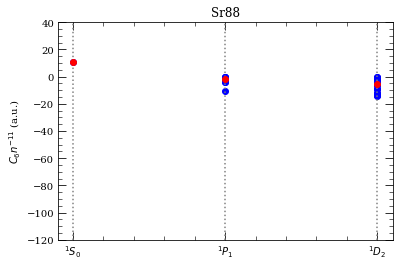

In [27]:
atom = Strontium88()
n = 40
s = 0
series = [[0,0,0],
          [1,1,1],
          [2,2,2]
         ]
f = plt.figure()
ax = f.add_subplot(1,1,1)
xtick=[]
xticklabel=[]

for i,l_j_mj in enumerate(series):
    calc = PairStateInteractions(atom,
                                 n, l_j_mj[0], l_j_mj[1],
                                 n, l_j_mj[0], l_j_mj[1], 
                                  l_j_mj[2], l_j_mj[2],
                                 s=s
                                )
    c6, eigenvectors = calc.getC6perturbatively(0,0,5, 30e9, degeneratePerturbation=True)

    # rescale results
    c6 = c6 / n**11 / 1.4448e-19  # to get a.u. used in C. Vaillant et.al. paper
    
    x = i * np.ones((len(c6)))
    ax.plot(x, c6, "bo")
    ax.axvline(x=x[0],linestyle=":",color="grey")
    
    c6 = calc.getC6perturbatively(0,0,4, 30e9, degeneratePerturbation=False)
    c6 = c6 / n**11 / 1.4448e-19  # to get a.u. used in C. Vaillant et.al. paper
    
    x = i * np.array([1])
    ax.plot(x, c6, "ro")
    
    xtick.append(i)
    xticklabel.append(r"$^%d%s_{%d}$" % (2*s+1, printStateLetter(l_j_mj[0]), l_j_mj[1]))

plt.title(atom.elementName)
ax.get_xaxis().set_ticks(xtick)
ax.set_xticklabels(xticklabel)
plt.ylabel("$C_6n^{-11}$ (a.u.)")
plt.ylim(-120, 40)
plt.show()
    

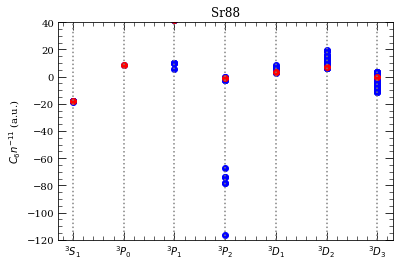

In [28]:
atom = Strontium88()
n = 40
s = 1
series = [[0,1,1],
          [1,0,0],
          [1,1,1],
          [1,2,2],
          [2,1,1],
          [2,2,2],
          [2,3,3]
         ]
f = plt.figure()
ax = f.add_subplot(1,1,1)
xtick=[]
xticklabel=[]

for i,l_j_mj in enumerate(series):
    calc = PairStateInteractions(atom,
                                 n, l_j_mj[0], l_j_mj[1],
                                 n, l_j_mj[0], l_j_mj[1], 
                                  l_j_mj[2], l_j_mj[2],
                                 s=s
                                )
    c6, eigenvectors = calc.getC6perturbatively(0,0,5, 30e9, degeneratePerturbation=True)

    # rescale results
    c6 = c6 / n**11 / 1.4448e-19  # to get a.u. used in C. Vaillant et.al. paper
    
    x = i * np.ones((len(c6)))
    ax.plot(x, c6, "bo")
    
    c6 = calc.getC6perturbatively(0,0,4, 30e9, degeneratePerturbation=False)
    c6 = c6 / n**11 / 1.4448e-19  # to get a.u. used in C. Vaillant et.al. paper
    
    x = i * np.array([1])
    ax.plot(x, c6, "ro")
    
    ax.axvline(x=x[0],linestyle=":",color="grey")
    xtick.append(i)
    xticklabel.append(r"$^%d%s_{%d}$" % (2*s+1, printStateLetter(l_j_mj[0]), l_j_mj[1]))
    
plt.title(atom.elementName)
ax.get_xaxis().set_ticks(xtick)
ax.set_xticklabels(xticklabel)
plt.ylabel("$C_6n^{-11}$ (a.u.)")
plt.ylim(-120, 40)
plt.show()
    

This reproduces (except for $^3D_2$ series) results from [C.V. et al J.Phys B **45**, 135004 (2012)](https://www.doi.org/10.1088/0953-4075/45/13/135004), Fig. 6.


Calculating Hamiltonian matrix...


	matrix (dimension  1007 )

Matrix R3 100.0 % (state 265 of 265)



Diagonalizing interaction matrix...

99% Now we are plotting...


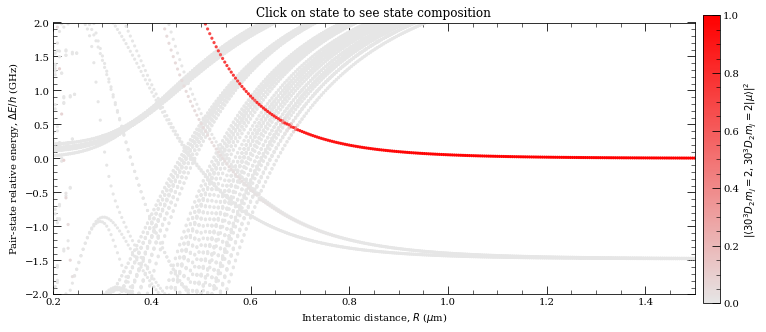

0

In [30]:

n0=30;l0=2;j0=2;mj0=2; #Target State
theta=0; #Polar Angle [0-pi]
phi=0; #Azimuthal Angle [0-2pi]
dn = 5; #Range of n to consider (n0-dn:n0+dn)
dl = 5; #Range of l values
deltaMax = 45e9 #Max pair-state energy difference [Hz]

#Set target-state
calc = PairStateInteractions(Strontium88(), n0,l0,j0,n0,l0,j0, mj0,mj0,interactionsUpTo = 1,
                            s=1)


#R array (um)
rvdw = 0.2
r=np.linspace(rvdw,1.5,300)

#Generate pair-state interaction Hamiltonian
calc.defineBasis(theta,phi, dn,dl, deltaMax,progressOutput=True, debugOutput=False)

#Diagonalise
nEig=250 #Number of eigenstates to extract
calc.diagonalise(r,nEig,progressOutput=True)
#Plot    
calc.plotLevelDiagram()
#Zoom-on on pair state
calc.ax.set_xlim(.2,1.5)
calc.ax.set_ylim(-2,2)
calc.showPlot()  # by default program will plot interactive plots
# however plots are interactive only if open oin standard window
# and not in the %inline mode of the notebooks

 Now we are plotting...


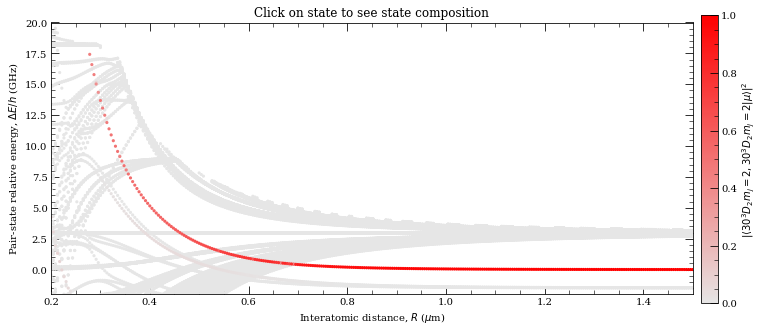

0

In [31]:
calc.plotLevelDiagram()
#Zoom-on on pair state
calc.ax.set_xlim(.2,1.5)
calc.ax.set_ylim(-2,20)
calc.showPlot()  # by default program will plot interactive plots
# however plots are interactive only if open oin standard window
# and not in the %inline mode of the notebooks

Here we are trying to reproduce Fig. 5.4 (d) from L.J., Christophe Vaillant PhD thesis



Diagonalizing interaction matrix...

99% Now we are plotting...


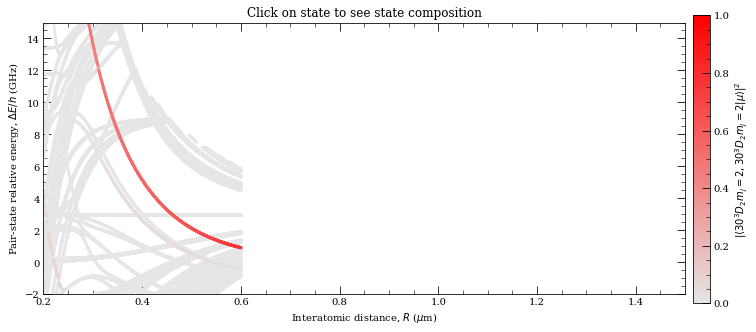

0

In [32]:
r=np.linspace(0.2,0.6,600)

nEig=250 #Number of eigenstates to extract
calc.diagonalise(r,nEig,progressOutput=True)
calc.plotLevelDiagram()
#Zoom-on on pair state
calc.ax.set_xlim(.2,1.5)
calc.ax.set_ylim(-2,15)
calc.showPlot()  # by default program will plot interactive plots
# however plots are interactive only if open oin standard window
# and not in the %inline mode of the notebooks

 Now we are plotting...


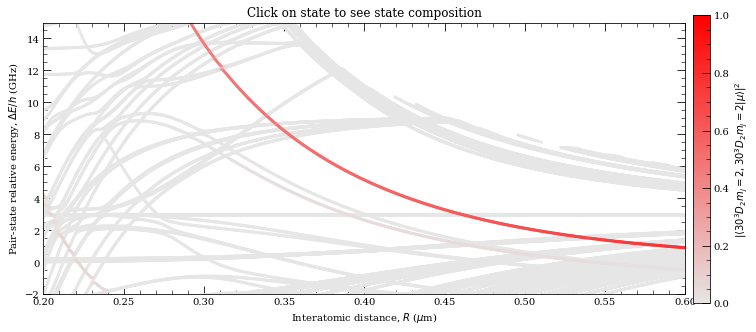

0

In [33]:
calc.plotLevelDiagram()
#Zoom-on on pair state
calc.ax.set_xlim(.2,0.6)
calc.ax.set_ylim(-2,15)
calc.showPlot()  # by default program will plot interactive plots
# however plots are interactive only if open oin standard window
# and not in the %inline mode of the notebooks

This basically shows similiar behaviour, however not exactly same. Yet, given that this is close to Le Roy radius, that is in spaghetti region, calculations here are realy sensitive to exact basis states that are included.

# Inter-species pair-state calculations


In [29]:
calc = PairStateInteractions(
    Rubidium(),
    60, 0, 0.5,
    54, 0, 0, 
    0.5, 0,
    s=0.5,
    atom2=Ytterbium174(),
    s2=0
    )

In [30]:
theta=0; #Polar Angle [0-pi]
phi=0; #Azimuthal Angle [0-2pi]
dn = 5; #Range of n to consider (n0-dn:n0+dn)
dl = 5; #Range of l values
deltaMax = 25e9 #Max pair-state energy difference [Hz]

#Generate pair-state interaction Hamiltonian
calc.defineBasis(theta,phi, dn,dl, deltaMax,progressOutput=True, debugOutput=False)
#Diagonalise



Calculating Hamiltonian matrix...


	matrix (dimension  946 )

Matrix R3 100.0 % (state 263 of 263)



/home/nikola/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)




Diagonalizing interaction matrix...

99% Now we are plotting...


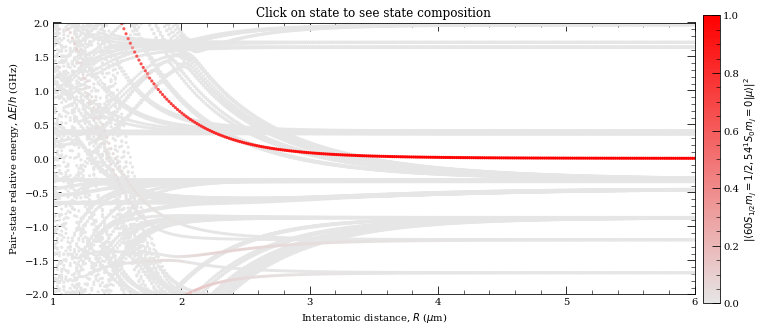

0

In [31]:
r=np.linspace(1,6,300)
nEig=150 #Number of eigenstates to extract
calc.diagonalise(r,nEig,progressOutput=True)
#Plot    
calc.plotLevelDiagram()
#Zoom-on on pair state
calc.ax.set_xlim(1,6)
calc.ax.set_ylim(-2,2)
calc.showPlot()  # by default program will plot interactive plots
# however plots are interactive only if open oin standard window
# and not in the %inline mode of the notebooks

Data points to fit =  251
Rvdw =   2.3932838618954793  mu m
offset =  -9.986838740735977e-07 
 scale =  -8.696094194442242


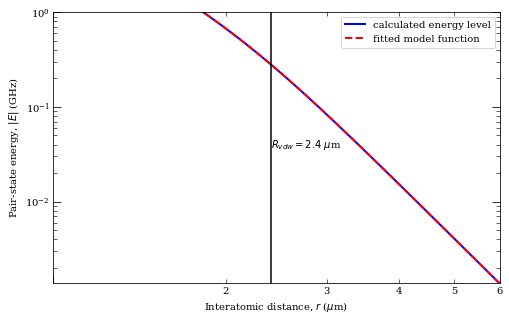

c3 =  7.757664746733516  GHz /R^3 (mu m)^3
offset =  -0.29445641367361136


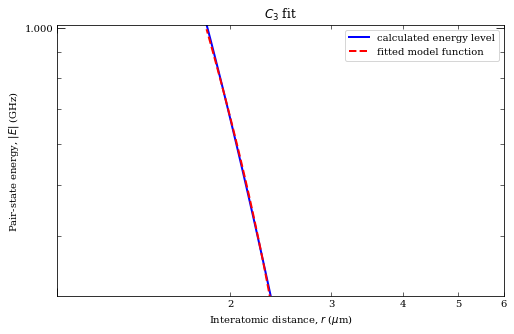

c6 =  62.35616579224586  GHz /R^6 (mu m)^6
offset =  0.00014479688282535122


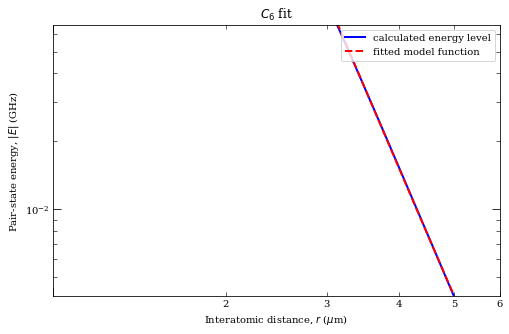

62.35616579224586

In [32]:
rvdw = calc.getVdwFromLevelDiagram(1.800000,6.000000,minStateContribution=0.6,showPlot=True)
calc.getC3fromLevelDiagram(1.8, rvdw*0.99,showPlot=True,minStateContribution=0.5)
calc.getC6fromLevelDiagram(1.3*rvdw, 5.,showPlot=True,minStateContribution=0.5)

In [33]:
c6 = calc.getC6perturbatively(0,0, 6, 45e9)
print("C_6 = %.5f GHz (mu m)^6" % (c6))

C_6 = -61.41713 GHz (mu m)^6


In [34]:
calc1 = PairStateInteractions(
    Rubidium(),
    84, 0, 0.5,
    89, 0, 0.5, 
    0.5, 0.5,
    s=0.5,
    atom2=Cesium(),
    s2=0.5
    )

calc2 = PairStateInteractions(
    Rubidium(),
    77, 0, 0.5,
    81, 0, 0.5, 
    0.5, 0.5,
    s=0.5,
    atom2=Cesium(),
    s2=0.5
    )

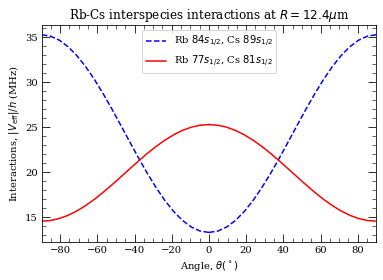

In [35]:
# specification of question

thetaList = np.linspace(0,pi/2.,20)  # orientations of the two atoms
atomDistance = 12.7 # mu m

# do calculation 1
interactionVeff = []
for t in thetaList:
    c6 = calc1.getC6perturbatively(t,0.,5,25e9)
    interactionVeff.append(-(c6/atomDistance**6)*1.e3)
    
# now plotting
ax = plt.subplot(111)
ax.plot(thetaList/pi*180, np.array(interactionVeff),"b--")
# symetric plot for 0- >-90
ax.plot(-thetaList/pi*180, np.array(interactionVeff) ,"b--", label="Rb $84 s_{1/2}$, Cs $89 s_{1/2}$")


# do calculation 2
interactionVeff = []
for t in thetaList:
    c6 = calc2.getC6perturbatively(t,0.,5,25e9)
    interactionVeff.append(-(c6/atomDistance**6)*1.e3)
    
# now plotting
ax.plot(thetaList/pi*180, np.array(interactionVeff),"r-")
# symetric plot for 0- >-90
ax.plot(-thetaList/pi*180, np.array(interactionVeff) ,"r-", label="Rb $77 s_{1/2}$, Cs $81 s_{1/2}$")
ax.legend()


ax.set_xlabel(r"Angle, $\theta (^\circ)$")
ax.set_ylabel(r"Interactions, $|V_{\rm eff}|/h$ (MHz)")
ax.set_xlim(-90,90)
ax.set_title(r"Rb-Cs interspecies interactions at $R=12.4 \mu$m")
plt.show()

This matches with Fig. 7 in *Phys. Rev. A* **92**, 042710 (2015) [https://doi.org/10.1103/PhysRevA.92.042710](https://doi.org/10.1103/PhysRevA.92.042710)

# Stark-tuned Forster resonances

Found  210  states.
Generating matrix...
100%

Finding eigenvectors...
100%

Found  210  states.
Generating matrix...
100%

Finding eigenvectors...
100%

Found  200  states.
Generating matrix...
100%

Finding eigenvectors...
100%

Found  200  states.
Generating matrix...
100%

Finding eigenvectors...
100%

E=400.00 V/m 

Found  210  states.
Generating matrix...
100%

Finding eigenvectors...
100%

E=400.00 V/m 

Found  200  states.
Generating matrix...
100%

Finding eigenvectors...
100%

E=400.00 V/m 

Found  210  states.
Generating matrix...
100%

Finding eigenvectors...
100%

Found  200  states.
Generating matrix...
100%

Finding eigenvectors...
100%

E=400.00 V/m 

Found  210  states.
Generating matrix...
100%

Finding eigenvectors...
100%

E=400.00 V/m 

Found  200  states.
Generating matrix...
100%

Finding eigenvectors...
100%

E=400.00 V/m 

Found  200  states.
Generating matrix...
100%

Finding eigenvectors...
100%

Found  200  states.
Generating matrix...
100%

Finding eigenvec

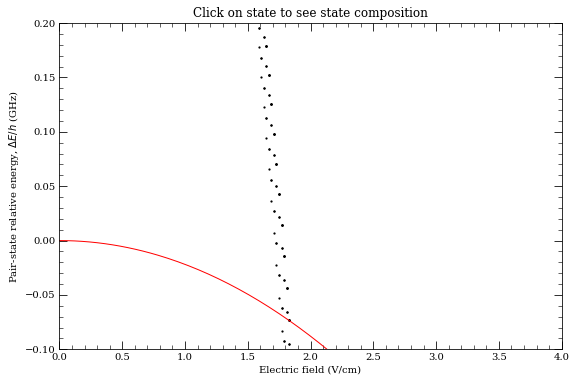

In [39]:
calculation = StarkMapResonances(Strontium88(preferQuantumDefects=True),
                                 [40,0,0,0,0],
                                 Strontium88(preferQuantumDefects=True),
                                 [40,2,2,0,0])
calculation.findResonances(35,45,20,np.linspace(0,400,200),
                           energyRange=[-1e8,2.e8],
                           progressOutput=True)    
calculation.showPlot()    



In [40]:
calculation.atom2.energyLevelsExtrapolated

True

# Wavefunction calculations for Alkali atom Rydberg states

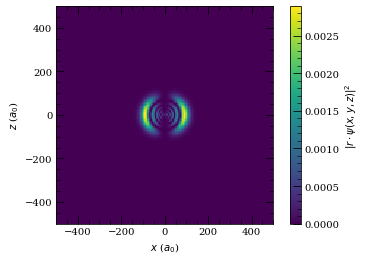

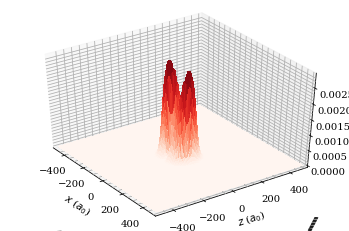

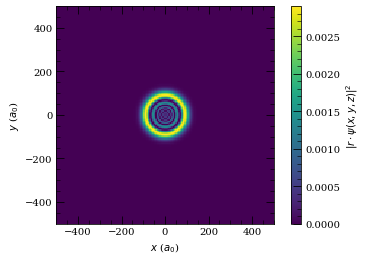

In [38]:
atom = Rubidium()
n = 10; l=1; j=1.5;  mj=1.5;
wf = Wavefunction(atom, [[n,l,j,mj]], [1])
wf.plot2D(plane="x-z", units="atomic")
plt.show()
wf.plot3D(plane="x-z", units="atomic")
plt.show()
wf.plot2D(plane="x-y", units="atomic")
plt.show()

Max overlap = 0.168
Eigen energy (state index 73) = -192.58 eV
Maximum contributions to this state
-0.4102815212568417
[28, 0, 0.5, 0.5]
-0.27654613145110857
[28, 1, 1.5, 0.5]
0.21332031019519113
[27, 1, 1.5, 0.5]
0.21166675717643682
[28, 1, 0.5, 0.5]



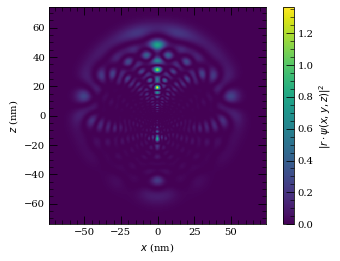

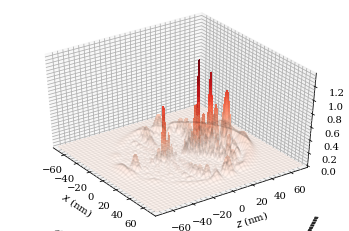

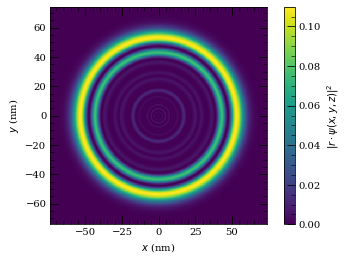

In [39]:
calc = StarkMap(Cesium())
states, coef, energy= calc.getState([28, 0, 0.5, 0.5], -24000,23,32,20, accountForAmplitude=0.95,
                       debugOutput=True)
atom = Cesium()
wf = Wavefunction(atom, states, coef)
wf.plot2D(plane="x-z", units="nm", pointsPerAxis=400, axisLength=2800)
plt.show()
wf.plot3D(plane="x-z", units="nm", pointsPerAxis=400,axisLength=2800)
plt.show()
wf.plot2D(plane="x-y", units="nm", pointsPerAxis=400,axisLength=2800) 
plt.show()

# Atom-surface van der Waals interactions (C3 calculation)

In [40]:
from arc.materials import Sapphire

atom = Cesium()
surface = Sapphire()
calc = AtomSurfaceVdW(atom, surface)

n1 = 6; l1 = 0; j1 = 0.5
coupledStates = [[6,1,0.5], [6,1,1.5], [7,1,0.5], [7,1,1.5]]
c3_1, c3_1_err = calc.getStateC3(n1,l1,j1,
                                 coupledStates,
                                 debugOutput=True)

6 2S 1/2 ->	C3 contr. (kHz mum^3) 	lambda (mum)	n
-> 6 2P 1/2	0.418 +- 0.001    	0.895		1.758

-> 6 2P 3/2	0.831 +- 0.001    	0.852		1.759

-> 7 2P 1/2	0.002 +- 0.000    	0.459		1.778

-> 7 2P 3/2	0.007 +- 0.000    	0.456		1.779

= = = = = = 	Total shift of 6 2S 1/2	= 1.258+-0.0017 kHz mum^3



In [41]:
n2 = 6; l2 = 1; j2 = 0.5
coupledStates = [[6,0,0.5], [7,0,0.5], [8,0,0.5], [9,0,0.5],
                [10,0,0.5],
                [5,2,1.5], [6,2,1.5], [7,2,1.5], [8,2,1.5],
                [9,2,1.5], [10,2,1.5], [11,2,1.5]]
c3_2, c3_2_err = calc.getStateC3(n2,l2,j2,
                                 coupledStates,
                                 debugOutput=True)

6 2P 1/2 ->	C3 contr. (kHz mum^3) 	lambda (mum)	n
-> 6 2S 1/2	0.418 +- 0.001    	-0.895		1.758

-> 7 2S 1/2	0.371 +- 0.001    	1.359		1.749

-> 8 2S 1/2	0.023 +- 0.002    	0.761		1.761

-> 9 2S 1/2	0.006 +- 0.000    	0.636		1.766

-> 10 2S 1/2	0.003 +- 0.000    	0.584		1.768

-> 5 2D 3/2	1.006 +- 0.021    	3.011		1.712

-> 6 2D 3/2	0.372 +- 0.009    	0.876		1.758

-> 7 2D 3/2	0.088 +- 0.001    	0.673		1.764

-> 8 2D 3/2	0.036 +- 0.003    	0.601		1.767

-> 9 2D 3/2	0.019 +- 0.001    	0.567		1.769

-> 10 2D 3/2	0.011 +- 0.001    	0.547		1.771

-> 11 2D 3/2	0.007 +- 0.001    	0.534		1.772

= = = = = = 	Total shift of 6 2P 1/2	= 2.359+-0.0235 kHz mum^3



In [42]:
c3 = (c3_2 - c3_1)/C_h * (1e6)**3  *1e-3
c3_err = np.sqrt(c3_2_err**2 + c3_1_err**2)/C_h * (1e6)**3  *1e-3
print("C_3 for transitions %s -> %s in contact with %s surface is %.3f +- %.3f kHz mum^3"
      % (printStateString(n1,l1,j1),
         printStateString(n2,l2,j2),
         surface.name,
         c3, c3_err))

C_3 for transitions 6 S 1/2 -> 6 P 1/2 in contact with Sapphire surface is 1.102 +- 0.024 kHz mum^3


# Optical lattice calculations (Bloch bands, Wannier states...)

Example of Bloch band structure with very weak optical lattice (depth of 4 recoil energies).

Omega_x = 50.96 kHz
Omega_y = 50.96 kHz
Omega_z = 50.96 kHz


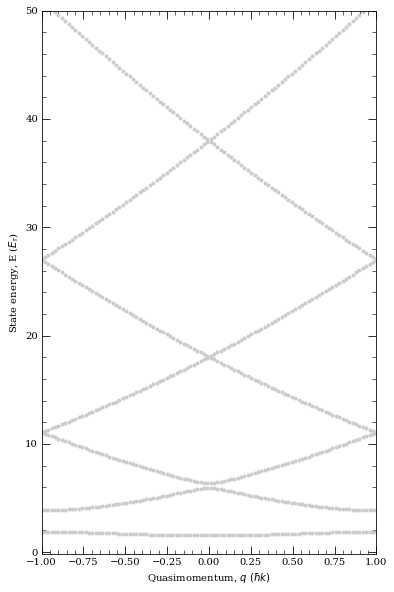

In [43]:
atom = Rubidium87()
trapWavelength = 1064e-9
lattice = OpticalLattice1D(atom, trapWavelength)

trapPotentialDepth = np.array([4, 4, 4]) * lattice.getRecoilEnergy()
trapFreq = lattice.getTrappingFrequency(trapPotentialDepth)

print("Omega_x = %.2f kHz\nOmega_y = %.2f kHz\nOmega_z = %.2f kHz" %
      (trapFreq[0] * 1e-3, trapFreq[1] * 1e-3, trapFreq[2] * 1e-3) )

lattice.defineBasis(35)
qMomentum = np.linspace(-1,1,100)
lattice.diagonalise(4, qMomentum, saveBandIndex=0)
fig = lattice.plotLevelDiagram()
plt.show()

## Wannier functions for deep optical traps

We can see Bloch wavefunctions first.

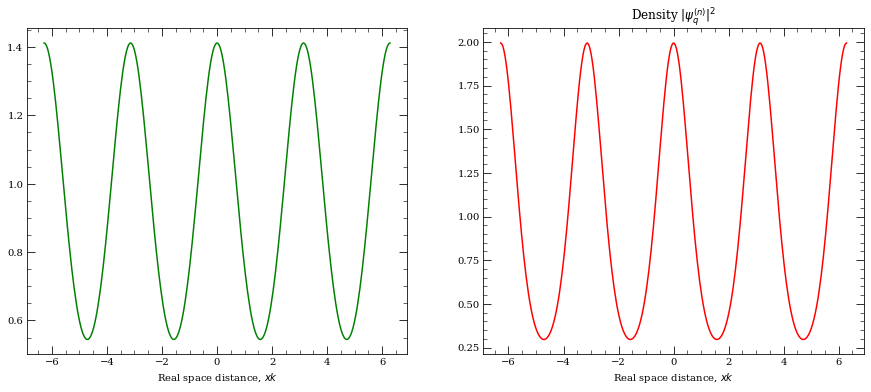

In [44]:
f = lattice.BlochWavefunction(4, +0.0, 0)
xList = np.linspace(-2 * np.pi, 2 * np.pi, 300)
y = []
for x in xList:
    y.append(f(x))
y = np.array(y)


f = plt.figure(figsize=(15, 6))
ax1 = f.add_subplot(1,2,1)
ax2 = f.add_subplot(1,2,2)  
    
ax1.plot(xList, np.real(y), "-", color="g")
#ax1.plot(xList, np.imag(y), "r--")
ax1.set_xlabel(r"Real space distance, $x k $")
plt.title("Real and imaginary part")
#plt.show()

ax2.plot(xList, np.absolute(y)**2, "-", color="r")
ax2.set_xlabel(r"Real space distance, $x k $")
plt.title(r"Density $|\psi_q^{(n)}|^2$")
plt.show()

If we plot band structure, we see energy clear gaps opening.

Omega_x = 161.16 kHz
Omega_y = 161.16 kHz
Omega_z = 227.92 kHz


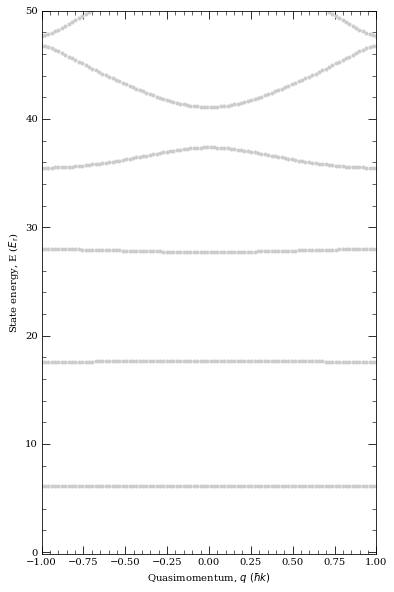

In [45]:
atom = Rubidium87()
trapWavelength = 1064e-9
lattice = OpticalLattice1D(atom, trapWavelength)

trapPotentialDepth = np.array([40, 40, 80]) * lattice.getRecoilEnergy()
trapFreq = lattice.getTrappingFrequency(trapPotentialDepth)

print("Omega_x = %.2f kHz\nOmega_y = %.2f kHz\nOmega_z = %.2f kHz" %
      (trapFreq[0] * 1e-3, trapFreq[1] * 1e-3, trapFreq[2] * 1e-3) )

Vlat = 40

lattice.defineBasis(25)
qMomentum = np.linspace(-1,1,100)
lattice.diagonalise(Vlat, qMomentum, saveBandIndex=0)
fig = lattice.plotLevelDiagram()
plt.show()

k = 1

xList = np.linspace(-2*pi, 2*pi, 201)
y = []
opticalLattice = [] 
for x in xList:
    y.append(lattice.getWannierFunction(x, latticeIndex = 0))
    opticalLattice.append(40 -40 * np.cos(k * x)**2)

Now let's plot them and compare them with Linear harmonic oscilator ground state

0.06283185307179551
Norm =  1.0000000000000009
Fitted gaussian 1/e width of probability = 70.41 nm
Calculated Gaussian width for LHO = 67.34 nm


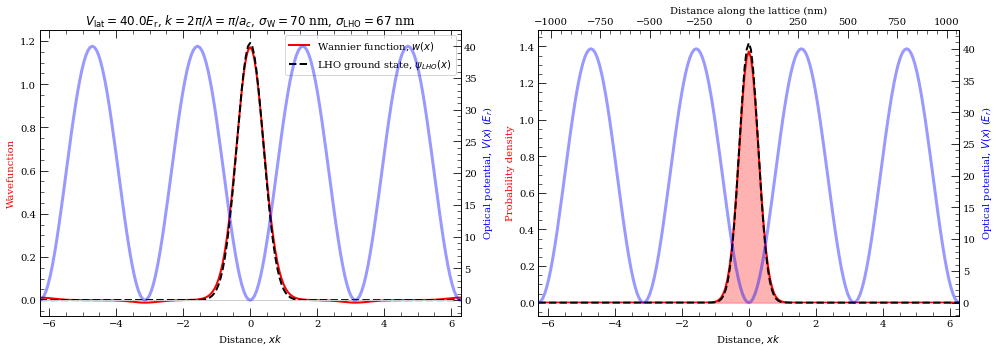

In [46]:
sigma = 67.34e-9
sigmaGauss_nm = sigma * 1.e9

ac = lattice.trapWavenegth/2

def lhoGroundState(x,sigma):
    return 1. / ((np.pi * sigma**2)**(1. / 4.)) * np.exp(- x**2 / (2. * sigma**2))
    

def align_yaxis(ax1, v1, ax2, v2):
    """adjust ax2 ylimit so that v2 in ax2 is aligned to v1 in ax1"""
    _, y1 = ax1.transData.transform((0, v1))
    _, y2 = ax2.transData.transform((0, v2))
    inv = ax2.transData.inverted()
    _, dy = inv.transform((0, 0)) - inv.transform((0, y1-y2))
    miny, maxy = ax2.get_ylim()
    ax2.set_ylim(miny+dy, maxy+dy)
    
dx = abs(xList[1] - xList[0])
print(dx)
y = np.array(y)
norm = np.linalg.norm(y)*sqrt(dx)
y = y / norm
s =0
for i in range(len(y)):
    s += (y[i].real**2+y[i].imag**2)*dx
print("Norm = ", s)

popt, pcov = curve_fit(lhoGroundState, xList, np.absolute(y), p0=[sigmaGauss_nm*1e-9 / (ac/(np.pi))] )
sigmaFit = popt[0] * (ac/(np.pi)) * 1e9
print("Fitted gaussian 1/e width of probability = %.2f nm" %sigmaFit)


f = plt.figure(figsize=(14,5))
ax1 = f.add_subplot(1,2,1)
ax1.plot(xList, np.real(y), "r-", lw=2)
lhog =[]
print("Calculated Gaussian width for LHO = %.2f nm" % sigmaGauss_nm)
for x in xList:
    lhog.append(lhoGroundState(x, sigmaGauss_nm*1e-9 / (ac/(np.pi))) )
    #lhog.append(lhoGroundState(x, sigmaFit*1e-9 / (ac/(np.pi))) )
ax1.plot(xList, lhog, "k--", lw=2)
plt.legend((r"Wannier function, $w(x)$",r"LHO ground state, $\psi_{LHO}(x)$"))

#plt.plot(xList, np.absolute(y)**2, "r-")
ax2 = ax1.twinx()
ax2.plot(xList, opticalLattice, "b-", alpha=0.4, lw=3)
ax2.axhline(linewidth=1, color='0.8', zorder = -5)
ax1.set_xlabel(r"Distance, $x k$")
ax2.set_ylim(-1, 1.1 * Vlat)
ax2.set_xlim(-2 * np.pi, 2 * np.pi)
#ax2.set_xlim(-3, 3)
ax2.set_ylabel("Optical potential, $V(x)$ ($E_r$)",color="b")
ax1.set_ylabel(r"Wavefunction",color="r")
align_yaxis(ax1,0,ax2,0) 
plt.title(r"$V_{\rm lat} = %.1f E_{\rm r}$, $k = 2\pi/\lambda = \pi/a_c$, $ \sigma_{\rm W} = %.0f$ nm, $\sigma_{\rm LHO} = %.0f$ nm" 
          % (Vlat, sigmaFit, (sigma * 1.e9)) )


ax3 = f.add_subplot(1,2,2)
probDensityDis =  np.absolute(y)**2
ax3.plot(xList, probDensityDis, "r-", lw=2)
ax3.set_ylabel(r"Probability density",color="r")
ax3.axhline(linewidth=1, color='0.8')
ax3.fill_between(xList, 0, probDensityDis, color="r", alpha=0.3)
ax3.plot(xList, np.array(lhog)**2, "k--", lw=2)

ax4 = ax3.twinx()
ax4.plot(xList, opticalLattice, "b-", alpha=0.4, lw=3)
ax3.set_xlabel(r"Distance, $x k$")

#ax3.axvspan(xList[stop], xList[start], alpha=0.5, color='red')

ax4.set_ylim(-1,1.1*Vlat)
ax4.set_xlim(-2*np.pi, 2*np.pi)
ax4.set_ylabel("Optical potential, $V(x)$ ($E_r$)",color="b")

align_yaxis(ax3,0,ax4,0) 


conversion = 1. / np.pi *  ac  *1e9
axS = ax3.twiny()
mn, mx = ax3.get_xlim()
axS.set_xlim(mn * conversion, mx * conversion)
axS.set_xlabel("Distance along the lattice (nm)")
plt.tight_layout()
plt.show()

# Calculations of dynamic polarisability and magic wavelengths for optical traps


In [3]:
atom = Cesium()
n = 10
calc = DynamicPolarizability(atom, n, 1, 1.5)
calc.defineBasis(atom.groundStateN, n+15)
alpha0, alpha1, alpha2, core, dynamic, closestState = calc.getPolarizability(1100e-9,units="au", accountForStateLifetime=True)

print("alpha0 = %.3e a.u." % (alpha0))
print("alpha2 = %.3e a.u." % (alpha2))


alpha0 = -4.699e+02 a.u.
alpha2 = -2.370e+01 a.u.


Resonance: 1172.05 nm 14 2S 1/2
Resonance: 1186.07 nm 12 2D 3/2
Resonance: 1209.19 nm 13 2S 1/2
Resonance: 1229.93 nm 11 2D 3/2
Resonance: 1265.39 nm 12 2S 1/2
Resonance: 1298.32 nm 10 2D 3/2


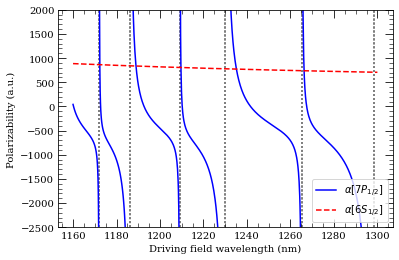

In [21]:
atom = Cesium()
n = 7
calc = DynamicPolarizability(atom, n, 1, 0.5)
calc.defineBasis(atom.groundStateN, n+15)
calc.getPolarizability(1100e-9,units="a.u.")


calcGroundState = DynamicPolarizability(atom, 6, 0, 0.5)
calcGroundState.defineBasis(atom.groundStateN, 25)

wavelengthList = np.linspace(1160, 1300,1000) * 1e-9  # m
ax = calc.plotPolarizability(wavelengthList, debugOutput=True, units="au")
calcGroundState.plotPolarizability(wavelengthList, debugOutput=True, units="au", addToPlotAxis=ax, line="r--")

import matplotlib.lines as mlines

ax.set_ylim(-2500,2000)

plt.legend(handles=[mlines.Line2D([], [], color="b", linestyle="-",
                          label=(r'$\alpha[%s]$' % printStateStringLatex(n,1,0.5))),
            mlines.Line2D([], [], color='r', linestyle='--',
                          label=(r'$\alpha[%s]$' % printStateStringLatex(6,0,0.5)))],
          loc='lower right')
plt.show()

Resonance: 1357.56 nm 11 2S 1/2
Resonance: 1376.58 nm 5 2D 3/2
Resonance: 1416.12 nm 9 2D 3/2
Resonance: 1530.73 nm 10 2S 1/2
Resonance: 1654.35 nm 8 2D 3/2


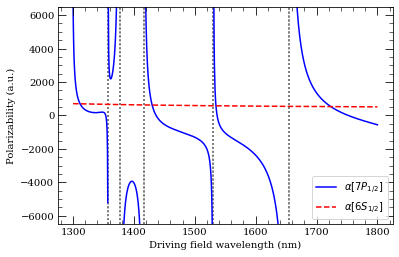

In [22]:
wavelengthList = np.linspace(1300, 1800,1000) * 1e-9  # m
ax = calc.plotPolarizability(wavelengthList, debugOutput=True, units="au")
calcGroundState.plotPolarizability(wavelengthList, debugOutput=True, units="au", addToPlotAxis=ax, line="r--")

import matplotlib.lines as mlines

ax.set_ylim(-6500,6500)

plt.legend(handles=[mlines.Line2D([], [], color="b", linestyle="-",
                          label=(r'$\alpha[%s]$' % printStateStringLatex(n,1,0.5))),
            mlines.Line2D([], [], color='r', linestyle='--',
                          label=(r'$\alpha[%s]$' % printStateStringLatex(6,0,0.5)))],
          loc='lower right')
plt.show()

Resonance: 1170.37 nm 15 2S 1/2
Resonance: 1180.52 nm 13 2D 5/2
Resonance: 1197.47 nm 14 2S 1/2
Resonance: 1211.76 nm 12 2D 5/2
Resonance: 1236.20 nm 13 2S 1/2
Resonance: 1257.42 nm 11 2D 5/2
Resonance: 1294.96 nm 12 2S 1/2
Resonance: 1180.52 nm 13 2D 5/2
Resonance: 1211.76 nm 12 2D 5/2
Resonance: 1212.11 nm 12 2D 3/2
Resonance: 1257.42 nm 11 2D 5/2
Resonance: 1257.91 nm 11 2D 3/2


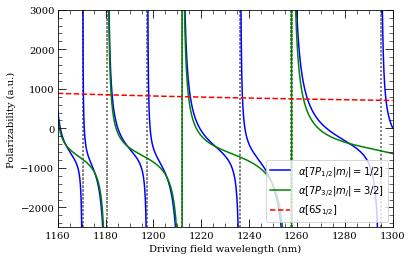

In [6]:
atom = Cesium()

n = 7
calc = DynamicPolarizability(atom, n, 1, 1.5)
calc.defineBasis(atom.groundStateN, 16)

calcGroundState = DynamicPolarizability(atom, 6, 0, 0.5)
calcGroundState.defineBasis(atom.groundStateN, 16)

wavelengthList = np.linspace(1160, 1300,2000) * 1e-9  # m
ax = calc.plotPolarizability(wavelengthList, mj=0.5, debugOutput=True, units="au", line="b-")
ax = calc.plotPolarizability(wavelengthList, mj=1.5, debugOutput=True, units="au", addToPlotAxis=ax, line="g-")
calcGroundState.plotPolarizability(wavelengthList, debugOutput=True, units="au", addToPlotAxis=ax, line="r--")

import matplotlib.lines as mlines

ax.set_ylim(-2500,3000)
ax.set_xlim(1160,1300)

plt.legend(handles=[mlines.Line2D([], [], color="b", linestyle="-",
                          label=(r'$\alpha[%s |m_j|=1/2]$' % printStateStringLatex(n,1,0.5))),
                    mlines.Line2D([], [], color="g", linestyle="-",
                          label=(r'$\alpha[%s |m_j|=3/2]$' % printStateStringLatex(n,1,1.5))),
            mlines.Line2D([], [], color='r', linestyle='--',
                          label=(r'$\alpha[%s]$' % printStateStringLatex(6,0,0.5)))],
          loc='lower right')
plt.show()

Resonance: 1328.89 nm 10 2D 5/2
Resonance: 1342.92 nm 5 2D 3/2
Resonance: 1360.81 nm 5 2D 5/2
Resonance: 1391.90 nm 11 2S 1/2
Resonance: 1451.60 nm 9 2D 5/2
Resonance: 1574.04 nm 10 2S 1/2
Resonance: 1701.70 nm 8 2D 5/2
Resonance: 1328.89 nm 10 2D 5/2
Resonance: 1329.71 nm 10 2D 3/2
Resonance: 1342.92 nm 5 2D 3/2
Resonance: 1360.81 nm 5 2D 5/2
Resonance: 1451.60 nm 9 2D 5/2
Resonance: 1453.25 nm 9 2D 3/2
Resonance: 1701.70 nm 8 2D 5/2
Resonance: 1705.28 nm 8 2D 3/2


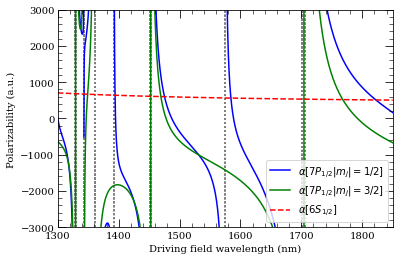

In [7]:
wavelengthList = np.linspace(1300, 1850,2000) * 1e-9  # m
ax = calc.plotPolarizability(wavelengthList, mj=0.5, debugOutput=True, units="au", line="b-")
ax = calc.plotPolarizability(wavelengthList, mj=1.5, debugOutput=True, units="au", addToPlotAxis=ax, line="g-")
calcGroundState.plotPolarizability(wavelengthList, debugOutput=True, units="au", addToPlotAxis=ax, line="r--")

import matplotlib.lines as mlines

ax.set_ylim(-3000,3000)
ax.set_xlim(1300,1850)

plt.legend(handles=[mlines.Line2D([], [], color="b", linestyle="-",
                          label=(r'$\alpha[%s |m_j|=1/2]$' % printStateStringLatex(n,1,0.5))),
                    mlines.Line2D([], [], color="g", linestyle="-",
                          label=(r'$\alpha[%s |m_j|=3/2]$' % printStateStringLatex(n,1,0.5))),
            mlines.Line2D([], [], color='r', linestyle='--',
                          label=(r'$\alpha[%s]$' % printStateStringLatex(6,0,0.5)))],
          loc='lower right')
plt.show()

Resonance: 1451.65 nm 9 2D 5/2
Resonance: 1453.15 nm 9 2D 3/2
Resonance: 1573.87 nm 10 2S 1/2
Resonance: 1451.65 nm 9 2D 5/2
Resonance: 1453.15 nm 9 2D 3/2


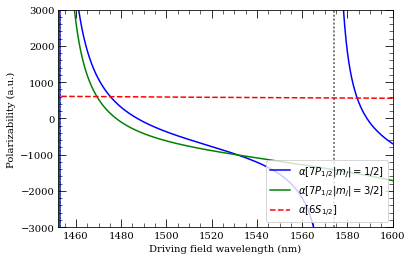

In [4]:
wavelengthList = np.linspace(1450, 1600,1000) * 1e-9  # m
ax = calc.plotPolarizability(wavelengthList, mj=0.5, debugOutput=True, units="au", line="b-")
ax = calc.plotPolarizability(wavelengthList, mj=1.5, debugOutput=True, units="au", addToPlotAxis=ax, line="g-")
calcGroundState.plotPolarizability(wavelengthList, debugOutput=True, units="au", addToPlotAxis=ax, line="r--")

import matplotlib.lines as mlines

ax.set_ylim(-3000,3000)
ax.set_xlim(1452,1600)

plt.legend(handles=[mlines.Line2D([], [], color="b", linestyle="-",
                          label=(r'$\alpha[%s |m_j|=1/2]$' % printStateStringLatex(n,1,0.5))),
                    mlines.Line2D([], [], color="g", linestyle="-",
                          label=(r'$\alpha[%s |m_j|=3/2]$' % printStateStringLatex(n,1,0.5))),
            mlines.Line2D([], [], color='r', linestyle='--',
                          label=(r'$\alpha[%s]$' % printStateStringLatex(6,0,0.5)))],
          loc='lower right')
plt.show()

Resonance: 1172.05 nm 14 2S 1/2
Resonance: 1186.07 nm 12 2D 3/2
Resonance: 1209.19 nm 13 2S 1/2
Resonance: 1229.93 nm 11 2D 3/2
Resonance: 1265.39 nm 12 2S 1/2
Resonance: 1298.32 nm 10 2D 3/2


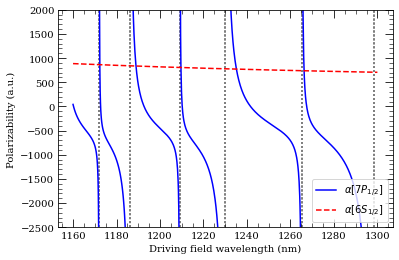

In [3]:
atom = Cesium()
n = 7
calc = DynamicPolarizability(atom, n, 1, 0.5)
calc.defineBasis(atom.groundStateN, n+15)
calc.getPolarizability(1100e-9,units="a.u.")


calcGroundState = DynamicPolarizability(atom, 6, 0, 0.5)
calcGroundState.defineBasis(atom.groundStateN, 25)

wavelengthList = np.linspace(1160, 1300,1000) * 1e-9  # m
ax = calc.plotPolarizability(wavelengthList, debugOutput=True, units="au")
calcGroundState.plotPolarizability(wavelengthList, debugOutput=True, units="au", addToPlotAxis=ax, line="r--")

import matplotlib.lines as mlines

ax.set_ylim(-2500,2000)

plt.legend(handles=[mlines.Line2D([], [], color="b", linestyle="-",
                          label=(r'$\alpha[%s]$' % printStateStringLatex(n,1,0.5))),
            mlines.Line2D([], [], color='r', linestyle='--',
                          label=(r'$\alpha[%s]$' % printStateStringLatex(6,0,0.5)))],
          loc='lower right')
plt.show()